# 데이터 증식(Data Augmentation)

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image

train_datagen = ImageDataGenerator(rescale=1./255,
        horizontal_flip=True,   # 수평 대칭 이미지를 50% 확률로 만들어 추가합니다.
        width_shift_range=0.1,  # 전체 크기의 10% 범위에서 좌우로 이동합니다.
        height_shift_range=0.1, # 마찬가지로 위, 아래로 이동합니다.
        rotation_range=5,
        shear_range=0.7,
        zoom_range=[0.9, 2.2],
        vertical_flip=True,
        fill_mode='nearest') 
train_datagen


In [2]:
path = 'data/data증식/'
batch_size = 5
train_generator = train_datagen.flow_from_directory(
       path,                     #+ #Z'고양이',   #학습셋이 있는 폴더의 위치입니다.
       target_size=(150, 150),
       batch_size=batch_size,    # 한 에포크당 몇장의 사진을 만들 것인가?
       class_mode='binary')

Found 20 images belonging to 2 classes.


batch=0 [1. 0. 0. 0. 1.]


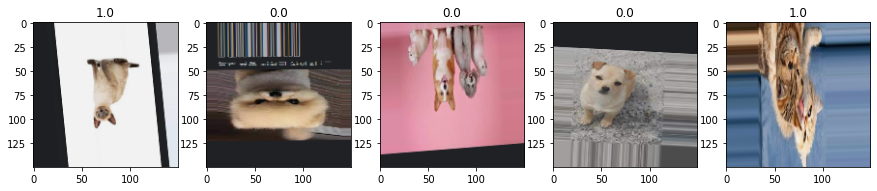

batch=1 [1. 1. 0. 0. 1.]


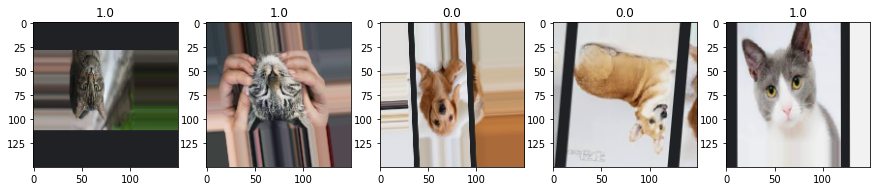

batch=2 [0. 0. 1. 1. 1.]


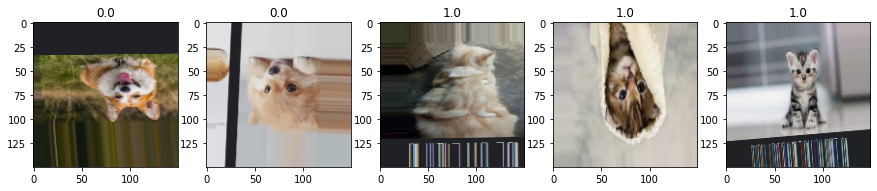

batch=3 [0. 1. 0. 0. 1.]


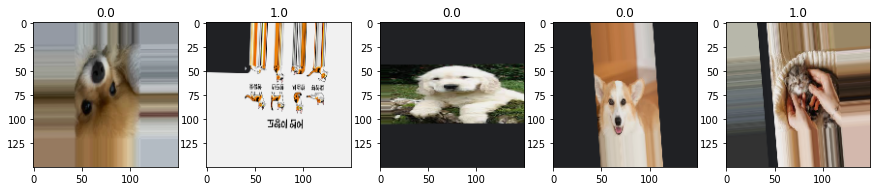

batch=4 [0. 0. 0. 0. 0.]


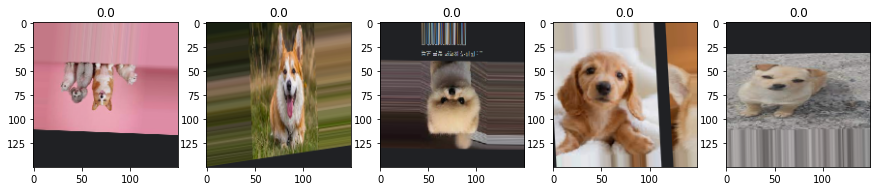

batch=5 [0. 1. 1. 1. 0.]


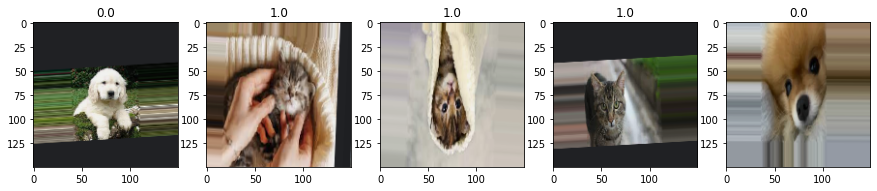

batch=6 [1. 1. 1. 1. 0.]


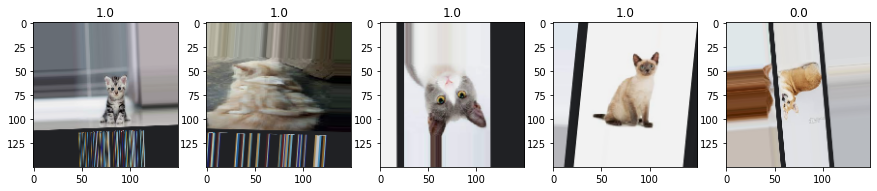

batch=7 [1. 0. 1. 0. 1.]


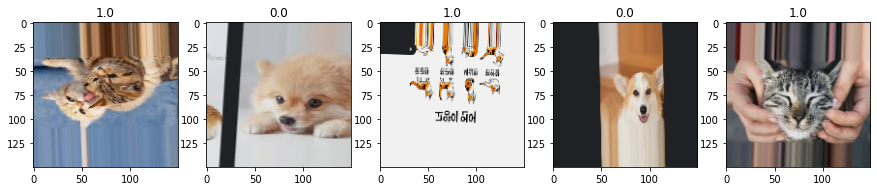

batch=8 [0. 0. 1. 0. 0.]


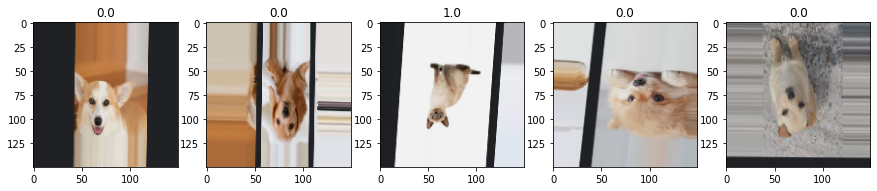

batch=9 [1. 1. 0. 0. 0.]


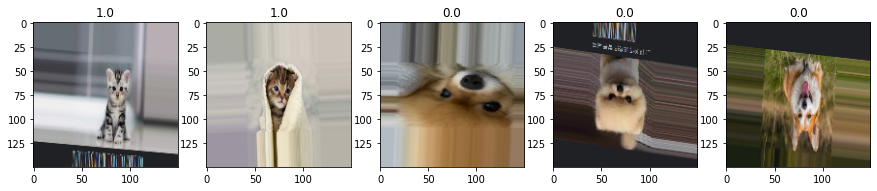

In [3]:
for i, (img, label) in enumerate(train_generator):
    print(f'batch={i}', label)
    plt.figure(figsize=(15, 15))
    for j in range(batch_size):
        plt.subplot(1, batch_size, j+1)
        plt.title(label[j])
        plt.imshow(img[j])
        ### 생성된 이미지 저장 
        im = Image.fromarray((img[j]*255).round().astype(np.uint8))
        im.save(path + f'new_img{i}-{j}-label{int(label[j])}.jpg')
    plt.show()
    if i >= 9:
        break

# 치매환자 MRI

## 치매환자의 MRI 이미지 출력

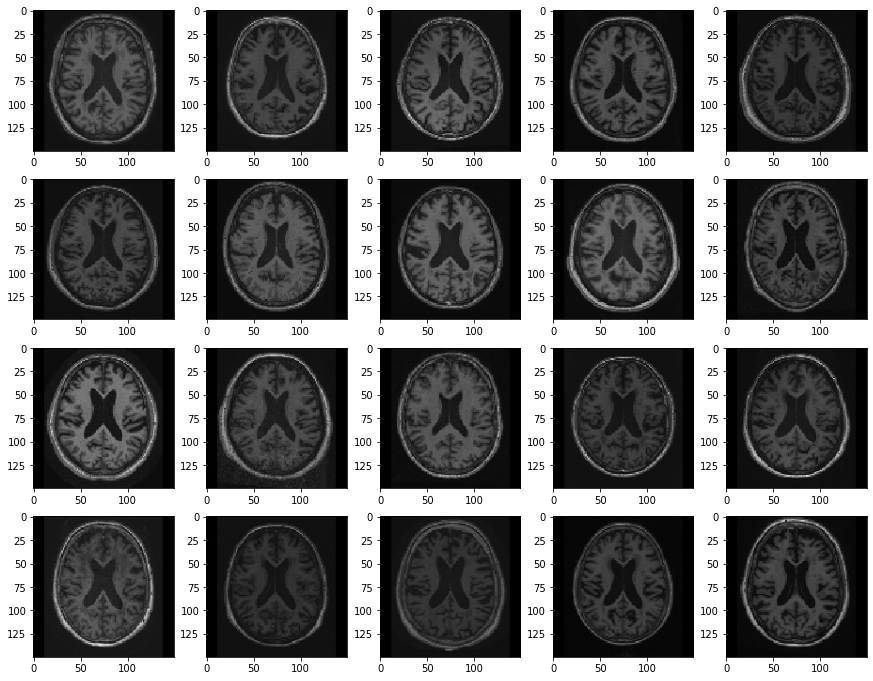

In [5]:
import matplotlib.pyplot as plt
## 10개의 ad 이미지를 화면에 표시해보기 (총 80개 데이터)
plt.figure(figsize=(15, 15))
for i in range(1, 21):
    img = plt.imread(f'data/brain_MRI_images/test/ad/ad_test_{i}.jpg')
#     img = np.array(PIL.Image.open(f'C:/data/brain_MRI_images/test/ad/ad_test_{i}.jpg'))
    plt.subplot(5, 5, i)
    plt.imshow(img)
plt.show()


In [7]:
print(img.shape)
img

(150, 150, 3)


array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

## 정상 MRI 이미지 출력

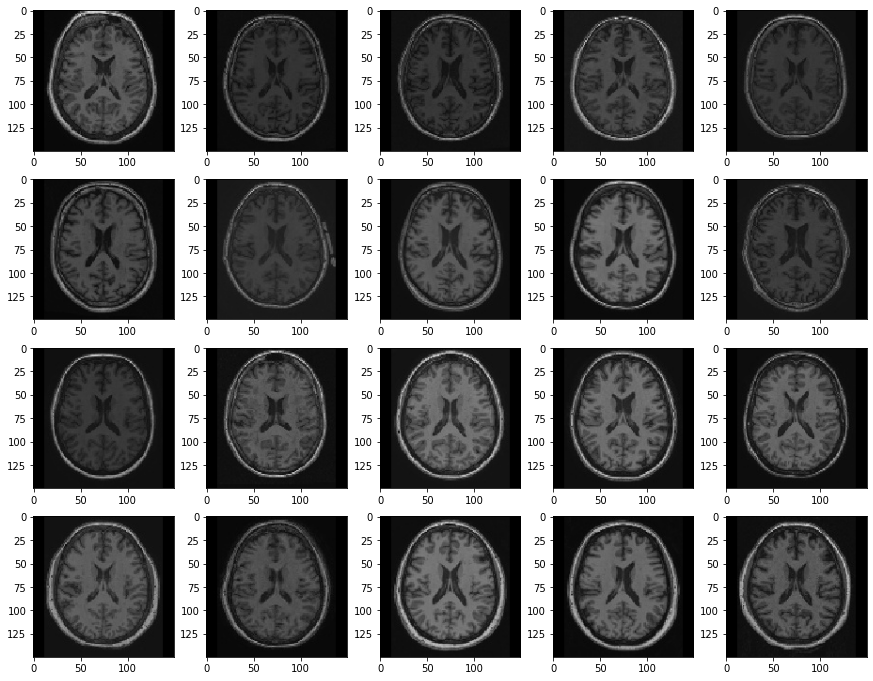

In [9]:
import matplotlib.pyplot as plt
## 10개의 ad 이미지를 화면에 표시해보기 (총 80개 데이터)
plt.figure(figsize=(15, 15))
for i in range(1, 21):
    img = plt.imread(f'data/brain_MRI_images/test/normal/normal_test_{i}.jpg')
#     img = np.array(PIL.Image.open(f'C:/data/brain_MRI_images/test/normal/normal_test_{i}.jpg'))
    plt.subplot(5, 5, i)
    plt.imshow(img)
plt.show()


## 분석 시작

In [24]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping 
from tensorflow.keras import optimizers 

import numpy as np 
import matplotlib.pyplot as plt 

# trainning set 의 변형을 설정 
train_datagen = ImageDataGenerator(rescale=1./255,          # 주어진 이미지의 크기를 설정합니다.
                                  horizontal_flip=True,     # 수평 대칭 이미지를 50% 확률로 만들어 추가합니다.
                                  width_shift_range=0.15,    # 전체 크기의 15% 범위에서 좌우로 이동합니다.
                                  height_shift_range=0.1,   # 마찬가지로 위, 아래로 이동합니다.
                                  #rotation_range=5,        # 정해진 각도만큼 회전시킵니다.
                                  #shear_range=0.7,         # 좌표 하나를 고정시키고 나머지를 이동시킵니다.
                                  zoom_range=1.2,          # 확대 또는 축소시킵니다.
                                  #vertical_flip=True,      # 수직 대칭 이미지를 만듭니다.
                                  #fill_mode='nearest'      # 빈 공간을 채우는 방법입니다. nearest 옵션은 가장 비슷한 색으로 채우게 됩니다.
)

In [18]:
# trainning set
train_generator = train_datagen.flow_from_directory(
    'data/brain_MRI_images/train',
    target_size = (150, 150),
    batch_size = 5,
    class_mode = 'binary'
)

Found 160 images belonging to 2 classes.


In [21]:
# test set
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    'data/brain_MRI_images/test',
    target_size = (150, 150),
    batch_size = 5,
    class_mode = 'binary'
)

Found 120 images belonging to 2 classes.


In [28]:
# CNN model 
model = Sequential() 
model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 activation_3 (Activation)   (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 activation_4 (Activation)   (None, 72, 72, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                  

In [36]:
# model compile 
model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.Adam(learning_rate=0.0001), 
#               optimizer=optimizers.Adam(learning_rate=0.01), 
              metrics=['accuracy'])

# model fit 
history = model.fit(
    train_generator,        ## generator로 생성한 데이터로 학습
    steps_per_epoch=10,    ## batch_size * steps_per_epoch = 데이터 수
    epochs=200,             
    validation_data=test_generator,
    validation_steps=10) 
                ## 한 epoch 종료 시 마다 검증할 때 사용되는 검증 스텝 수를 지정합니다.


Epoch 1/200
10/10 [==============================] - 15s 667ms/step - loss: 0.6955 - accuracy: 0.4600 - val_loss: 0.6940 - val_accuracy: 0.4800
Epoch 2/200
10/10 [==============================] - 6s 571ms/step - loss: 0.6898 - accuracy: 0.5400 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 3/200
10/10 [==============================] - 7s 686ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6919 - val_accuracy: 0.5400
Epoch 4/200
10/10 [==============================] - 7s 632ms/step - loss: 0.6925 - accuracy: 0.5200 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 5/200
10/10 [==============================] - 5s 490ms/step - loss: 0.6934 - accuracy: 0.5200 - val_loss: 0.6912 - val_accuracy: 0.5600
Epoch 6/200
10/10 [==============================] - 5s 535ms/step - loss: 0.6924 - accuracy: 0.4800 - val_loss: 0.6976 - val_accuracy: 0.3800
Epoch 7/200
10/10 [==============================] - 6s 577ms/step - loss: 0.6984 - accuracy: 0.4200 - val_loss: 0.6933 - val_accuracy: 0.500

<AxesSubplot:>

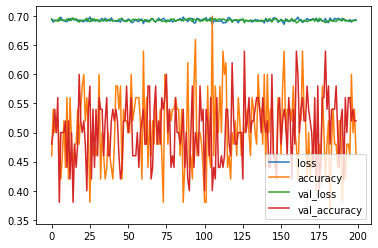

In [37]:
import pandas as pd
df_history = pd.DataFrame(history.history)
df_history.plot()

In [ ]:
#결과를 그래프로 표현하는 부분입니다.
acc= history.history['accuracy']
val_acc= history.history['val_accuracy']
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))  

plt.figure(figsize=(8, 5))
plt.plot(x_len, acc, marker='.', c="red", label='Trainset_acc')
plt.plot(x_len, val_acc, marker='.', c="orange", label='Testset_acc')
plt.plot(x_len, y_vloss, marker='.', c="green", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

plt.legend(loc='right') 
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss/acc')
plt.show()


# 전이학습(Transfer Learning)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import optimizers
from tensorflow.keras.applications import VGG16

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

path = '/content/drive/MyDrive/Colab Notebooks/'

# trainning set 의 변형을 설정
train_datagen = ImageDataGenerator(rescale=1./255,          # 주어진 이미지의 크기를 설정합니다.
                                  horizontal_flip=True,     # 수평 대칭 이미지를 50% 확률로 만들어 추가합니다.
                                  width_shift_range=0.15,    # 전체 크기의 15% 범위에서 좌우로 이동합니다.
                                  height_shift_range=0.1,   # 마찬가지로 위, 아래로 이동합니다.
                                  #rotation_range=5,        # 정해진 각도만큼 회전시킵니다.
                                  #shear_range=0.7,         # 좌표 하나를 고정시키고 나머지를 이동시킵니다.
                                  zoom_range=1.2,          # 확대 또는 축소시킵니다.
                                  #vertical_flip=True,      # 수직 대칭 이미지를 만듭니다.
                                  #fill_mode='nearest'      # 빈 공간을 채우는 방법입니다. nearest 옵션은 가장 비슷한 색으로 채우게 됩니다.
)

# trainning set
train_generator = train_datagen.flow_from_directory(
    path + 'data/brain_MRI_images/train',
    target_size = (150, 150),
    batch_size = 5,
    class_mode = 'binary'
)

# test set
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    path + 'data/brain_MRI_images/test',
    target_size = (150, 150),
    batch_size = 5,
    class_mode = 'binary'
)

Found 160 images belonging to 2 classes.
Found 120 images belonging to 2 classes.


In [ ]:
## VGG16 모델 불러오기
transfer_model = VGG16(weights = 'imagenet', include_top=False, input_shape=(150, 150, 3))
transfer_model.trainable = False  # 기 학습모델은 traindksgka
transfer_model.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                              

In [ ]:
# 모델 설정 (기학습 모델을 전이받아 모델 추가)
finetune_model = Sequential()
finetune_model.add(transfer_model)      # transfer_model을 시작점으로 셋팅
finetune_model.add(Flatten())
finetune_model.add(Activation('relu'))
finetune_model.add(Dropout(0.5))
finetune_model.add(Dense(1))
finetune_model.add(Activation('sigmoid'))
finetune_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 activation (Activation)     (None, 8192)              0         
                                                                 
 dropout (Dropout)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 1)                 8193      
                                                                 
 activation_1 (Activation)   (None, 1)                 0         
                                                                 
Total params: 14,722,881
Trainable params: 8,193
Non-tra

In [ ]:
# 모델 컴파일
finetune_model.compile(loss='binary_crossentropy',
                       optimizer='adam',
                       metrics=['accuracy'])

# 조기 중단 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)

history = finetune_model.fit(
    train_generator,
    epochs=100,
    validation_data = test_generator,
    validation_steps=10,
    callbacks=[early_stopping_callback]
)

Epoch 1/100
32/32 [==============================] - 66s 2s/step - loss: 0.8122 - accuracy: 0.5312 - val_loss: 0.6965 - val_accuracy: 0.5800
Epoch 2/100
32/32 [==============================] - 9s 272ms/step - loss: 0.7824 - accuracy: 0.5500 - val_loss: 0.5445 - val_accuracy: 0.8000
Epoch 3/100
32/32 [==============================] - 5s 167ms/step - loss: 0.6288 - accuracy: 0.6187 - val_loss: 0.6497 - val_accuracy: 0.5200
Epoch 4/100
32/32 [==============================] - 5s 148ms/step - loss: 0.7857 - accuracy: 0.5562 - val_loss: 0.4648 - val_accuracy: 0.8800
Epoch 5/100
32/32 [==============================] - 4s 120ms/step - loss: 0.5906 - accuracy: 0.6938 - val_loss: 0.4322 - val_accuracy: 0.8200
Epoch 6/100
32/32 [==============================] - 3s 81ms/step - loss: 0.6652 - accuracy: 0.6125 - val_loss: 0.4026 - val_accuracy: 0.9200
Epoch 7/100
32/32 [==============================] - 2s 54ms/step - loss: 0.6016 - accuracy: 0.6750 - val_loss: 0.3418 - val_accuracy: 0.9400
Epo

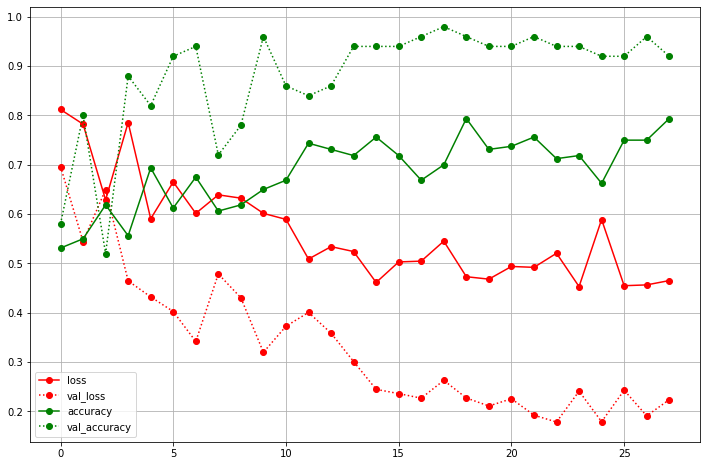

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12, 8))

loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.plot(loss, 'ro-', label='loss')
plt.plot(val_loss, 'ro:', label='val_loss')
plt.plot(accuracy, 'go-', label='accuracy')
plt.plot(val_accuracy, 'go:', label='val_accuracy')
plt.legend()
plt.grid()
plt.show()

In [ ]:
##################################################
#  치매환자의 MRI(1) 검증
##################################################
right_cnt = 0
for i in range(1, 61):
    test_img = Image.open(path + f'data/brain_MRI_images/test/ad/ad_test_{i}.jpg')
    test_img_array = np.array(test_img) / 255.
    predicted = finetune_model.predict(test_img_array[np.newaxis,:, :, :]).round()[0, 0]
    print(f"({i}) {predicted}")
    if predicted == 0: ## 일반인의 뇌
        right_cnt += 1
print(f"정답 수: {right_cnt},  Accuracy: {right_cnt / i}, Total sample: {i}")



1/1 [==============================] - 1s 726ms/step
(1) 0.0
1/1 [==============================] - 0s 17ms/step
(2) 0.0
1/1 [==============================] - 0s 16ms/step
(3) 0.0
1/1 [==============================] - 0s 15ms/step
(4) 0.0
1/1 [==============================] - 0s 17ms/step
(5) 0.0
1/1 [==============================] - 0s 20ms/step
(6) 0.0
1/1 [==============================] - 0s 17ms/step
(7) 0.0
1/1 [==============================] - 0s 16ms/step
(8) 0.0
1/1 [==============================] - 0s 16ms/step
(9) 0.0
1/1 [==============================] - 0s 21ms/step
(10) 0.0
1/1 [==============================] - 0s 21ms/step
(11) 0.0
1/1 [==============================] - 0s 16ms/step
(12) 0.0
1/1 [==============================] - 0s 20ms/step
(13) 0.0
1/1 [==============================] - 0s 18ms/step
(14) 0.0
1/1 [==============================] - 0s 17ms/step
(15) 0.0
1/1 [==============================] - 0s 17ms/step
(16) 0.0
1/1 [===========================

In [ ]:
##################################################
#  일반인의 MRI(1) 검증
##################################################
right_cnt = 0
for i in range(1, 61):
    test_img = Image.open(path + f'data/brain_MRI_images/test/normal/normal_test_{i}.jpg')
    test_img_array = np.array(test_img) / 255.
    predicted = finetune_model.predict(test_img_array[np.newaxis,:, :, :]).round()[0, 0]
    print(f"({i}) {predicted}")
    if predicted == 1: ## 일반인의 뇌
        right_cnt += 1
print(f"정답 수: {right_cnt},  Accuracy: {right_cnt / i}, Total sample: {i}")

1/1 [==============================] - 0s 47ms/step
(1) 1.0
1/1 [==============================] - 0s 76ms/step
(2) 1.0
1/1 [==============================] - 0s 39ms/step
(3) 1.0
1/1 [==============================] - 0s 37ms/step
(4) 1.0
1/1 [==============================] - 0s 24ms/step
(5) 1.0
1/1 [==============================] - 0s 31ms/step
(6) 1.0
1/1 [==============================] - 0s 68ms/step
(7) 1.0
1/1 [==============================] - 0s 23ms/step
(8) 1.0
1/1 [==============================] - 0s 23ms/step
(9) 1.0
1/1 [==============================] - 0s 35ms/step
(10) 1.0
1/1 [==============================] - 0s 24ms/step
(11) 1.0
1/1 [==============================] - 0s 26ms/step
(12) 1.0
1/1 [==============================] - 0s 25ms/step
(13) 1.0
1/1 [==============================] - 0s 26ms/step
(14) 1.0
1/1 [==============================] - 0s 31ms/step
(15) 1.0
1/1 [==============================] - 0s 24ms/step
(16) 1.0
1/1 [============================